# Сборный проект 1 "Определение модели оценки потенциально популярного товара на примере  игоровых платформ"


Проектная работа посвящена исследованию данных о продаже компьютерных игр с целью выявления закономерностей, определеющих успех игры.
Под успехом игры понимается ее популярность. 
Иными словами высокий спрос, и, как следствие активные продажи.
Анализ будут проведен на базе данных из общедоступных источников.
Важные установки-модель должна быть сформирована концептуально - как принцип работы с данными, чтобы быть применимой для любого периода (не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года).


#### Задачи по проекту:
1.Привести данные к оптимальному виду (загрузить, выполнить предобработку).
2.Выполнить исследовательский анализ данных и выявить самые успешные игры.
3.Определить критерии успешности и определить закономерности, определяющие успешность игры.
4.сформулировать вывод, и, если это будет возможно, дать комментарии.

Шаг 1. Откройте файл с данными и изучите общую информацию

In [78]:
import pandas as pd

data_games = pd.read_csv('/datasets/games.csv')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [79]:
data_games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [80]:
data_games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Исходные данные представлены в виде таблицы из 11 столбцов и 16715 строк.
5 столбцов со строковыми значениями
6 с вещественными числами (дробные)
По первичной визуальной оценке полученный объект df – это DataFrame с пропусками.
Пропуски в колонках:
Name                  2
Year_of_Release     269
Genre                 2
Critic_Score       8578
User_Score         6701
Rating             6766

#### Посмотрим вариативность данных:

In [81]:
data_games['Name'].value_counts()

Need for Speed: Most Wanted                     12
Ratatouille                                      9
LEGO Marvel Super Heroes                         9
Madden NFL 07                                    9
FIFA 14                                          9
                                                ..
Deal or No Deal: The Banker is Back!             1
Battleship / Connect Four / Sorry! / Trouble     1
Bleach: Soul Carnival 2                          1
Kekkon: Marriage                                 1
Star Fox: Assault                                1
Name: Name, Length: 11559, dtype: int64

In [82]:
data_games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [83]:
data_games['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [84]:
data_games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [85]:
data_games['NA_sales'].value_counts()

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: NA_sales, Length: 402, dtype: int64

In [86]:
data_games['EU_sales'].value_counts()

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_sales, Length: 307, dtype: int64

In [87]:
data_games['JP_sales'].value_counts()

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_sales, Length: 244, dtype: int64

In [88]:
data_games['Other_sales'].value_counts()

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: Other_sales, Length: 155, dtype: int64

In [89]:
data_games['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [90]:
data_games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
1.5       2
1.9       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [91]:
data_games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Шаг 2. Подготовьте данные

Исходя из оценки данных и задания проекта, неоходимы следующие действия по предобработке.
1.приведение названий колонок к нижнему регистру
2.преобразование данных в нужные типы
3.Оценка необходимости и возможности замены нулевых значений в колонках
NA_sales
EU_sales
JP_sales
Other_sales
4.замена данных со значением tbd в колонке User_Score (в задании указано, что такое значения в колонке с рейтингом)
5.замена пропущенных значений (или удаление строк с пропущенными значениями)
Name                  2
Year_of_Release     269
Genre                 2
Critic_Score       8578
User_Score         6701
Rating             6766
6.посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [92]:
data_games.columns = data_games.columns.str.lower()

приводим заголовки шапки таблицы к нижнему регистру и проверяем успешность замены

In [93]:
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


проверим как и нужно ли заполнять колонки с нулевыми значениями.
делаем допущение, что нулевые продажи в отдельных колонках-норма для исходных данных.
например, некоторые игры могли просто не выходить в определенных регионах.
что мы и видим, сделав соотвествующий срез данных.
в таком случае, делаем вывод, что необходимо обработать только те сроки, где сумма всех продаж равна нулю.
добавим соответствующую колонку
проверим количество строк и примем решение о возможности их удаления по количеству таких строк (до 5% от всех данных)

In [94]:
data_games_1 = data_games.copy()
data_games_1.query('na_sales ==0 or eu_sales ==0 or jp_sales ==0 or other_sales == 0').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,2011.0,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008.0,Shooter,4.81,1.88,0.00,0.69,84.0,7.6,M
103,Just Dance,Wii,2009.0,Misc,3.48,2.99,0.00,0.73,49.0,8,E10+
116,Just Dance 4,Wii,2012.0,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T
148,Final Fantasy XII,PS2,2006.0,Role-Playing,1.88,0.00,2.33,1.74,92.0,7.6,T
155,LEGO Star Wars: The Complete Saga,Wii,2007.0,Action,3.57,1.55,0.00,0.51,80.0,8.9,E10+


In [95]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [96]:
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [97]:
data_games.query('total_sales == 0').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


общее количество строк, в которых общие продажи равны 0 только 2, что однозначно меньше порогового значения для удаления данных в 1%
эти строки можно исключить из анализируемого df

In [98]:
data_games = data_games[data_games['total_sales'] > 0]

In [99]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16711 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16711 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


В колонке User_Score есть строки со значением tbd
Эти значения можно заменить на NaN
Нулями заменять нельзя 
Nan игнорируется корреляцией и вызывают ошибку в стат-тесте.
Если заменить на 0, то корреляция и стат-тест покажут смещенные значения
Заменим значения и сразу приведем к типу float для дальнейшем работы с данными (из object)
Тип object в последующем помешает строить графики и проводить тесты

In [100]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = float('nan')
data_games.user_score

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16713, dtype: object

In [101]:
data_games['user_score'] = data_games['user_score'].astype(float)
data_games.user_score

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16713, dtype: float64

In [102]:
data_games = data_games[~data_games['name'].isna()]

обработаем строки с пропущенными значениями для поля year_of_release.
это 269 строк (менее 2% данных) - можно удалить
сделаем это через логическую фильтрацию (~ = нет) и сразу переведем в тип int

In [103]:
data_games = data_games[~data_games['year_of_release'].isna()]

In [104]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')

In [105]:
data_games.year_of_release

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16442, dtype: int64

обработаем строки с пропущенными значениями для поля rating
заменим их на любое специальное значение, например "undefined"

In [106]:
data_games['rating'] = data_games['rating'].fillna(value='undefined')
data_games.rating

0                E
1        undefined
2                E
3                E
4        undefined
           ...    
16710    undefined
16711    undefined
16712    undefined
16713    undefined
16714    undefined
Name: rating, Length: 16442, dtype: object

In [107]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
name               16442 non-null object
platform           16442 non-null object
year_of_release    16442 non-null int64
genre              16442 non-null object
na_sales           16442 non-null float64
eu_sales           16442 non-null float64
jp_sales           16442 non-null float64
other_sales        16442 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16442 non-null object
total_sales        16442 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [108]:
data_games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8459
user_score         8979
rating                0
total_sales           0
dtype: int64

В талице с исходными данными все попуски обработаны.
Пропуски остались только в тех колонках, где их заполнение ненужно (или даже исказит исследование)
тип данных изменен
колонка с общей суммой продаж добавлена
данные готовы для дальнейшей работы с ними

---
## Комментарий от наставника

Пропуски оставлены, верно. Лучше работать с меньшим количеством данных хорошего качества. Можно использовать индикаторные значения для заполнения пропущенных значений. Так мы просто пометим места пропусков. Главное помнить об этом и не использовать их в анализе.

---

Шаг 3. Проведите исследовательский анализ данных

1.Посмотрите, сколько игр выпускалось в разные годы. 
Важны ли данные за все периоды?
Посмотрим распределение веса по годам выпуска игр и продаж, и определим несущественные годы.
По сути, этим действием мы находим долю каждого года, и решаем, какие из них можно отбросить.

находим общее кол-во игр (оно нам потом понадобится для расчета долей)

In [109]:
total_games=len(data_games)
total_games

16442

строим сводную таблицу, чтобы посчитать кол-во игр по годам

In [110]:
pivot_games = data_games.pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .sort_values(by = 'name', ascending=False)

pivot_games.columns = ['count_of_games']

pivot_games

,count_of_games
year_of_release,
2009,1426
2008,1425
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


построим график

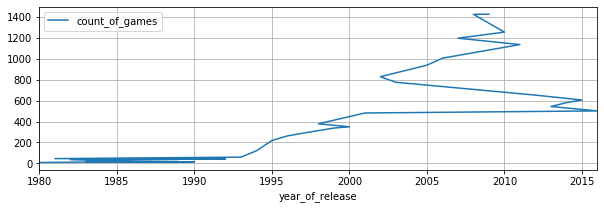

In [111]:
pivot_games.plot(grid=True, figsize=(10, 3))

и найдем долю каждого года

In [112]:
pivot_games['share_%'] = pivot_games['count_of_games'] / total_games

pivot_games

,count_of_games,share_%
year_of_release,,
2009,1426,0.086729
2008,1425,0.086668
2010,1255,0.076329
2007,1197,0.072801
2011,1136,0.069091
2006,1006,0.061185
2005,939,0.057110
2002,829,0.050420
2003,775,0.047135


предложение исключить все годы, доля по которым менее 2%, с 1980 по 1997год

аналогично для выручки

находим общий объем продаж по всем играм (это значение нам потом понадобится для расчета долей)

In [113]:
total_sales_sum=data_games['total_sales'].sum()
total_sales_sum

8814.369999999999

строим сводную таблицу, чтобы найти суммарнуу выручку по годам

In [114]:
pivot_games_revenue = data_games.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values(by = 'total_sales', ascending=False)

pivot_games_revenue.columns = ['revenue']

pivot_games_revenue

,revenue
year_of_release,
2008,671.50
2009,658.82
2007,604.75
2010,590.13
2006,517.71
2011,507.58
2005,457.82
2004,418.68
2002,394.97


строим график

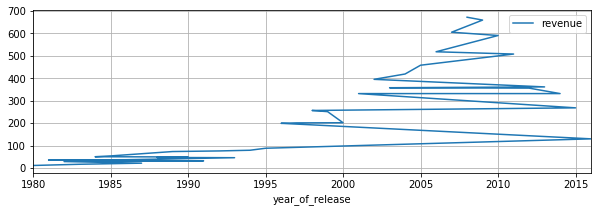

In [115]:
pivot_games_revenue.plot(grid=True, figsize=(10, 3))

и найдем долю каждого года (по выручке)

In [116]:
pivot_games_revenue['share_%'] = pivot_games_revenue['revenue'] / total_sales_sum

pivot_games_revenue

,revenue,share_%
year_of_release,,
2008,671.50,0.076182
2009,658.82,0.074744
2007,604.75,0.068610
2010,590.13,0.066951
2006,517.71,0.058735
2011,507.58,0.057586
2005,457.82,0.051940
2004,418.68,0.047500
2002,394.97,0.044810


анализ данных по выручке по годам показывает схожую картину.
исключим из анализа годы с 1980 по 1997год

In [117]:
data_games = data_games.query('year_of_release >1997')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15185 entries, 0 to 16714
Data columns (total 12 columns):
name               15185 non-null object
platform           15185 non-null object
year_of_release    15185 non-null int64
genre              15185 non-null object
na_sales           15185 non-null float64
eu_sales           15185 non-null float64
jp_sales           15185 non-null float64
other_sales        15185 non-null float64
critic_score       7954 non-null float64
user_score         7433 non-null float64
rating             15185 non-null object
total_sales        15185 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


кол-во строк в исходном дата фрейме 16714
кол-во строк с дата фрейме, очищенном от незначимых периодов 15185
процент исключенных из анализа данных чуть более 9%, что в пределах допустимых 10%.

Вывод по пункту.
За все годы выпускалось разное количество игр.
Минимальное - в 1980г. - 9 игр
Максимальное в 2009г. - 1426 игр.
Принимаем допущение, что можно удалить игры, по которым их вес в общей структуре данных не более 1.5% по количеству или 1% по выручке

2.Посмотрите, как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?


выясним, как менялись продажи по платформам.

In [118]:
sales_by_platform = data_games.pivot_table(index = 'platform',
                       values = 'total_sales',
                       aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False)

sales_by_platform


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,454.72
PS4,314.14
GBA,312.88
PSP,289.53


составим список топ платформ с суммарными продажи свыше 600 млн.$

In [119]:
top_platforms = sales_by_platform[sales_by_platform['total_sales'] > 600]
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


построим гистограммы для этих платформ

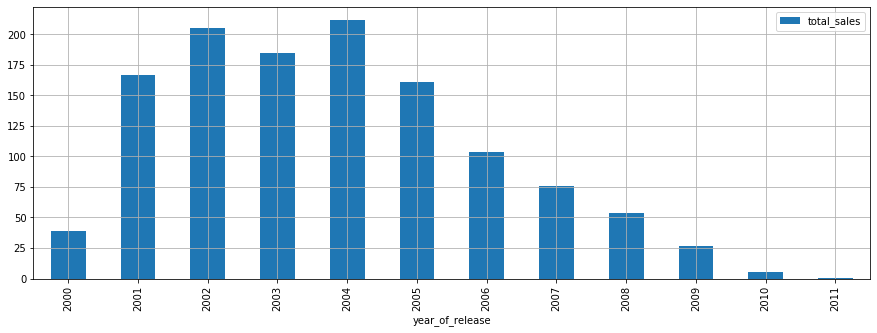

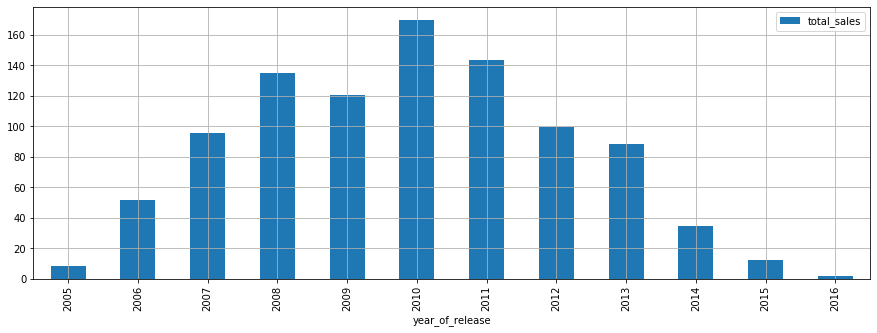

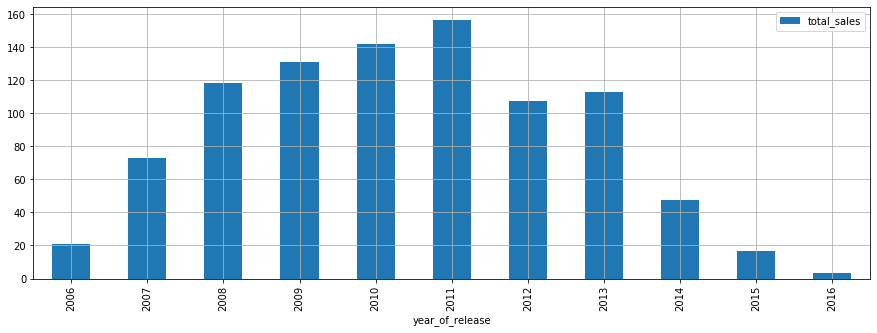

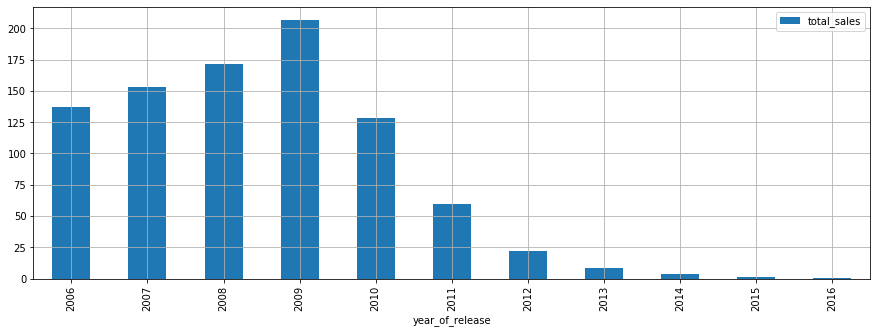

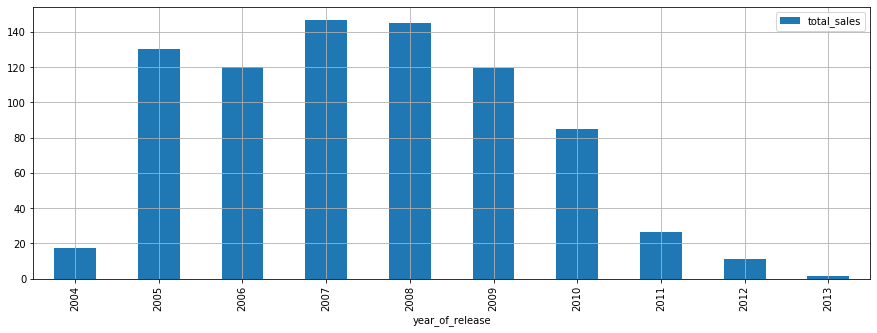

In [120]:
for row in top_platforms.index:
    data_games[data_games['platform'] == row].\
                            pivot_table(index='year_of_release', values = 'total_sales', aggfunc = 'sum').\
                            plot(kind = 'bar', grid = True, figsize =(15,5))

Теория говорит о том, что каждый товар проходит через свой жизненный пик, который характеризуется 4 стадиями, внедрение, рост, зрелость, спад.
Условно примем стадию роста и зрелости за тот самый преиод, в которые появляются новые и исчезают старые платформы (так как с точки зрения задачи проекта,снас интересует именно показатель выручки, период внедрения и спада откинем - внедерние затратный этап жизненного цикла продукта, а спад-малоприбыльный, и порой может тянутся, принося выручку, но, являясь низкоприбыльным)
То есть, нас интересует "горб" - или две стадии жизненного цикла - рост и зарелость.
Если применить теорию к нашим графикам, и посмотреть на все эти графики распределения продаж по годам, можно заметить, что на каждом из них есть тот самый классчический "горб"
Платформа запускается, набирает пользовательский спрос, далее выходит на пик своего жизненного цикла, далее отмирает.
Если визуально оценить все графики, видим, что отметка 100 млн. долларов вполне подойдет, чтобы считать ее пороговой для активной фазы жизненного цикла каждой из платформ-именно выше этого порога на каждом из графиков проходит "горб".
Посчитаем количество уникальных лет, когда продажи были выше порога

создадим выборку по по платформам из списка топ 5

In [121]:
platform_by_year = data_games.groupby(['platform','year_of_release']).agg({'total_sales':'sum'}).query('total_sales>100').\
                   query('platform in ("PS2", "X360", "PS3","Wii","DS")')

platform_by_year

total_sales
platform year_of_release             
DS       2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
PS2      2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
PS3      2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
X360     2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84

посчитаем количество уникальных лет, когда продажи были выше порога - это и уюдет сроком жизни платформы

In [122]:
print(len(platform_by_year.query('platform in ("PS2")')))

print(len(platform_by_year.query('platform in ("X360")')))

print(len(platform_by_year.query('platform in ("PS3")')))

print(len(platform_by_year.query('platform in ("Wii")')))

print(len(platform_by_year.query('platform in ("DS")')))

6
4
6
5
5


За какой характерный срок появляются новые и исчезают старые платформы - средний срок 4-6 лет.
Для дальнейших расчетов этот срок составит 5 лет

3.Возьмите данные за соответствующий актуальный период. 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 
Основной фактор — эти данные помогут построить прогноз на 2017 год.

---
## Комментарий от наставника

Верное значение по средней продолжительности существования платформы. Здорово, что оно подкреплено расчетами. Также выбран правильный актуальный год. 

---

Актуальный период должен быть не больше срока жизни платформы - нас же интересует выручка, то есть, с точки зрения жизненного цикла товара период, когда он приносит максимальную выручку и прибыль.
Для 2017 год это будет период - 2012-2016 год (5 лет)

4.Не учитывайте в работе данные за предыдущие годы.

создадим соответствующим df


In [123]:
data_games_upd = data_games.query('year_of_release > 2011')
data_games_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             2886 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


5.Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

посмотрим общую динамику по всем платформам

In [124]:
sales_by_platform_total= data_games_upd.groupby('platform')\
                        .agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending=False)

sales_by_platform_total

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


платформы с самыми низкими продажами исключим

In [125]:
data_games_upd.query('platform != "PSP" and platform != "DS"\
                                             and platform != "Wii" and platform != "PSV"')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


In [126]:
sales_by_platform_upd = data_games_upd.pivot_table(index='year_of_release', columns='platform', aggfunc='sum')

sales_by_platform_upd

critic_score                                              \
platform                 3DS    DS      PC     PS3     PS4   PSP     PSV   
year_of_release                                                            
2012                  2409.0  80.0  3759.0  6821.0     NaN   0.0  2116.0   
2013                  1334.0   0.0  2416.0  6098.0  1064.0  74.0  1614.0   
2014                  1448.0   NaN  2896.0  2333.0  3803.0   0.0  2156.0   
2015                  1351.0   NaN  2543.0    63.0  6276.0   0.0  1003.0   
2016                   719.0   NaN  3402.0     0.0  7024.0   NaN   743.0   

                                        ... user_score                       \
platform           Wii    WiiU    X360  ...         DS     PC    PS3    PS4   
year_of_release                         ...                                   
2012             381.0  1351.0  6511.0  ...       16.2  352.5  668.0    NaN   
2013               0.0  1954.0  3951.0  ...        4.8  203.4  591.4   81.9   
2014               0.0  1061.0  1657.0  ...        NaN  239.5  395.1  350.5   
2015               0.0  1346.0     0.0  ...        NaN  245.5  154.6  607.6   
2016               0.0   654.0     0.0  ...        NaN  283.4   39.7  694.3   

                                                         
platform          PSP    PSV   Wii   WiiU   X360   XOne  
year_of_release                                          
2012             12.1  218.1  66.6  129.0  604.9    NaN  
2013             11.7  186.3  24.1  221.2  378.0   98.8  
2014              0.0  277.8  12.7  135.9  311.9  296.5  
2015              0.0  180.0   0.0  138.9  137.9  356.1  
2016              NaN  101.1   0.0   65.4   29.2  435.5  

[5 rows x 77 columns]

In [127]:
sales_by_platform_upd.drop(['na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score'],\
                          axis = 'columns', inplace = True)

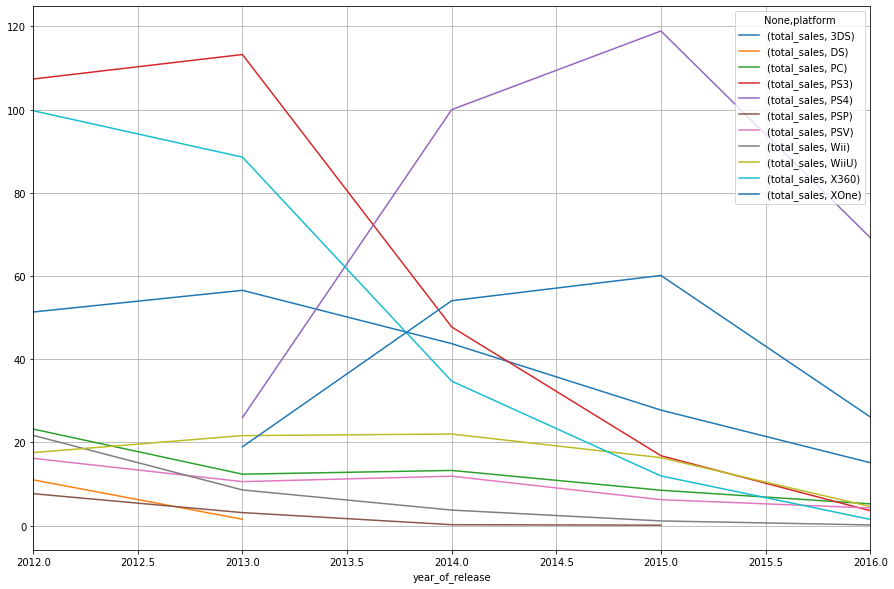

In [128]:
sales_by_platform_upd.plot(grid=True, figsize=(15, 10))

некоторые платформы  падают, например, X360, несмотря на значительный объем продаж и PS3	

выбираем наименее падающие платформы (который начали падать позже других) или сохраняющие продажи (с плвнм спадом): PS4,PSV,XOne 


---
## Комментарий от наставника

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

---

6.Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
Велика ли разница в продажах? 
А в средних продажах на разных платформах? Опишите результат.

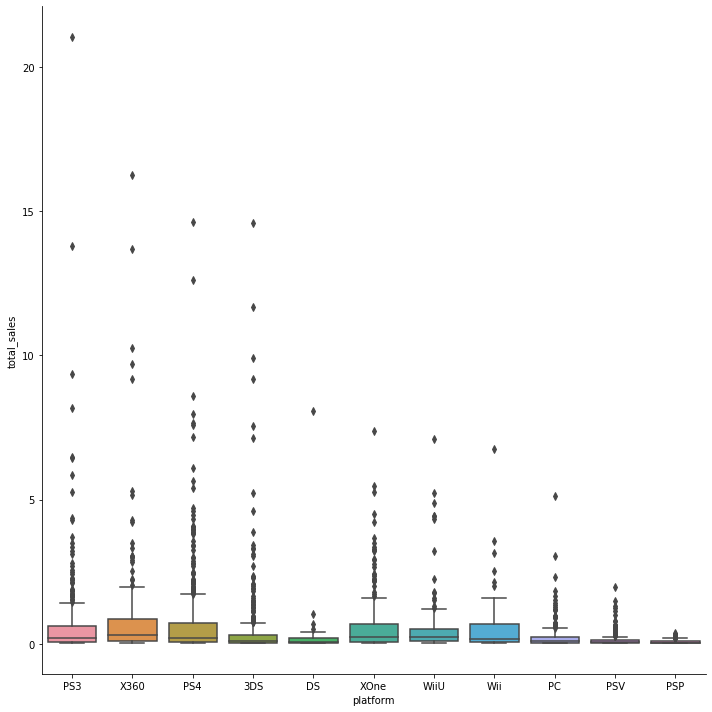

In [129]:
import seaborn as sns
sns.catplot(x='platform',y='total_sales', data=data_games_upd, kind='box', height=10)

По итогам визуализации видим, что разница в продажах колеблется до нескольких млн. долларов, при этом, разница по средним продажам еще больше, т.к. на них влияют выбросы, которые по всем почти платформам достаточно ощутимы (например, палтформа PS3 среднее значение в районе 1.5 млн., выбросы на уровне 22 млн.)

7.Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
Сформулируйте выводы.

проанализируем платформу:PS4

видим незначительну отрицательную корреляцию , что говорит о том, что зависимости продаж от отзывов пользователей нет. Если она и есть, то минимальная обратная.

исследуем корреляцию между оценкой пользователей и продажами

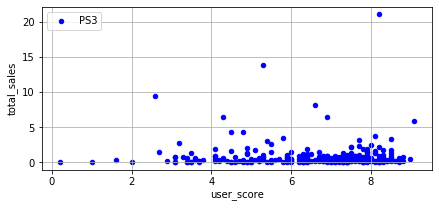

корреляция по платформе PS3 :
-0.005143522887113816


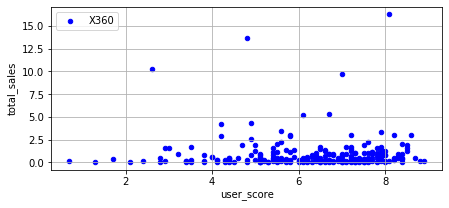

корреляция по платформе X360 :
0.0061639786462133256


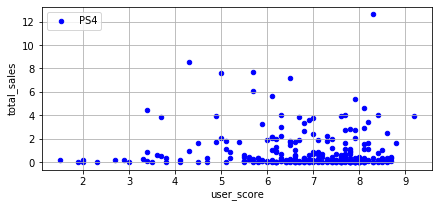

корреляция по платформе PS4 :
-0.031957110204556424


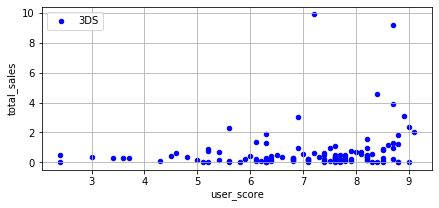

корреляция по платформе 3DS :
0.19758263411038596


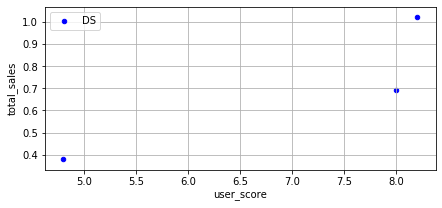

корреляция по платформе DS :
0.88270872757644


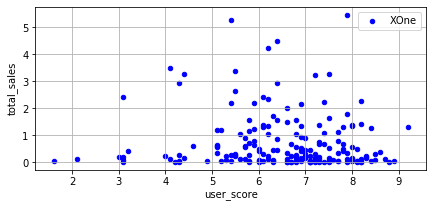

корреляция по платформе XOne :
-0.06892505328279412


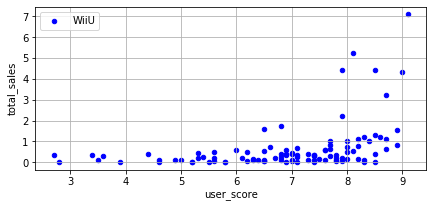

корреляция по платформе WiiU :
0.4002190202148617


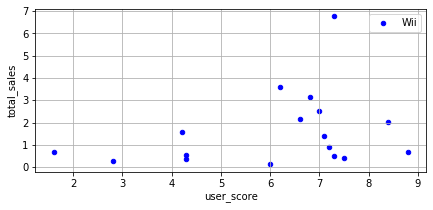

корреляция по платформе Wii :
0.2961968000747953


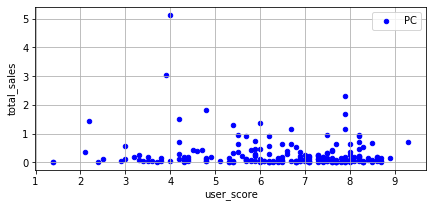

корреляция по платформе PC :
-0.12186747630735577


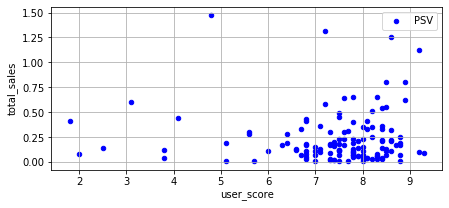

корреляция по платформе PSV :
-0.004339437514314869


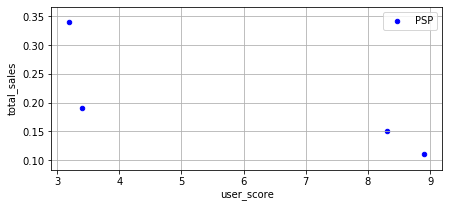

корреляция по платформе PSP :
-0.802302061939321


In [130]:
import matplotlib.pyplot as plt

for row in data_games_upd.platform.unique():
        
        users = data_games_upd[data_games_upd['platform'] == row]
        
        users_gr = data_games_upd[data_games_upd['platform'] == row]\
        .plot(x = 'user_score', y = 'total_sales', kind ='scatter',\
        grid=True, figsize =(7,3), label='row', color ='b')
        
        
        plt.legend([row])
        plt.show()
        print('корреляция по платформе', row,':')
        print(users['total_sales'].corr(users['user_score']))

делаем аналогичное исследование по отзывам критиков

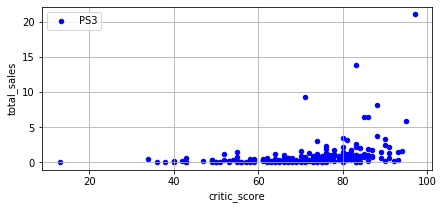

корреляция по платформе PS3 :
0.3314972592629587


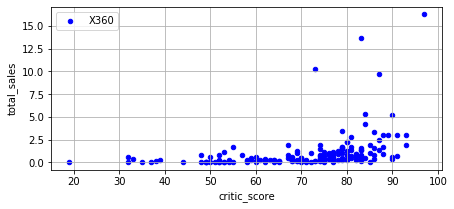

корреляция по платформе X360 :
0.36057348885073365


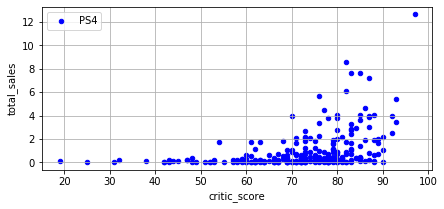

корреляция по платформе PS4 :
0.406567902061781


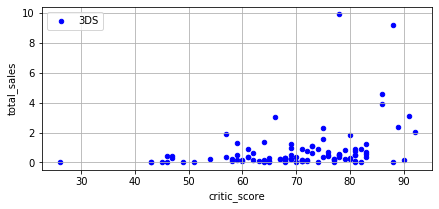

корреляция по платформе 3DS :
0.32080286953607845


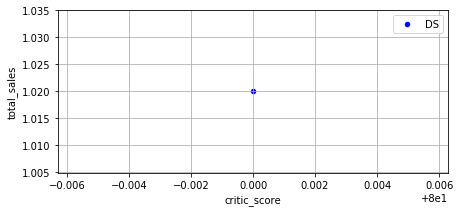

корреляция по платформе DS :
nan


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


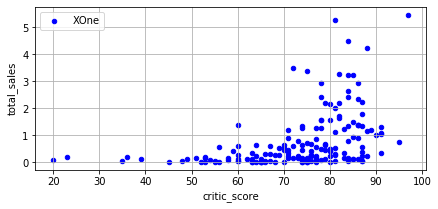

корреляция по платформе XOne :
0.41699832800840175


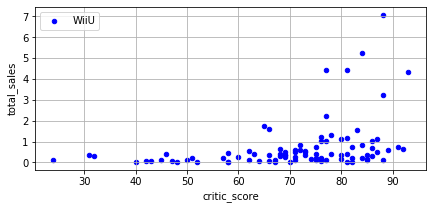

корреляция по платформе WiiU :
0.3483797601201749


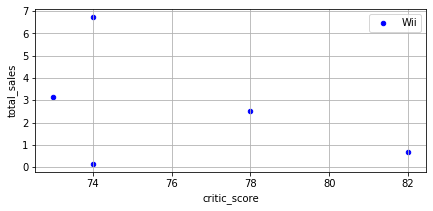

корреляция по платформе Wii :
-0.4243413011077495


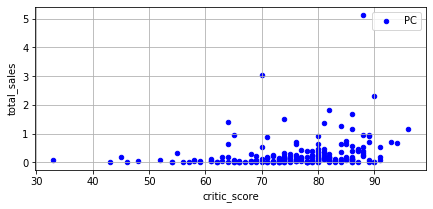

корреляция по платформе PC :
0.23724324311567918


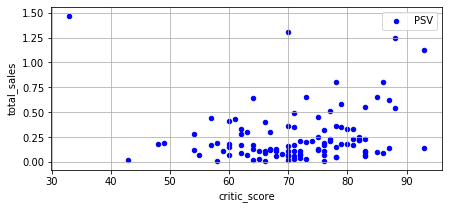

корреляция по платформе PSV :
0.09448789929316172


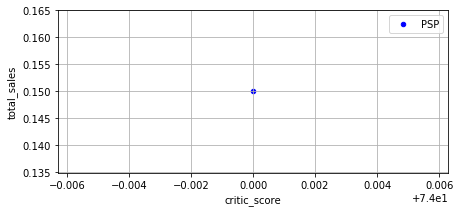

корреляция по платформе PSP :
nan


In [131]:
import matplotlib.pyplot as plt

for row in data_games_upd.platform.unique():
        
        critics = data_games_upd[data_games_upd['platform'] == row]
        
        users_gr = data_games_upd[data_games_upd['platform'] == row]\
        .plot(x = 'critic_score', y = 'total_sales', kind ='scatter',\
        grid=True, figsize =(7,3), label='row', color ='b')
        
        
        plt.legend([row])
        plt.show()
        print('корреляция по платформе', row,':')
        print(critics['total_sales'].corr(critics['critic_score']))

проанализируем платформу:PS4

видим незначительную (менее 0.5) корреляцию между оценкой критиков и продажами.
Безусловно, можно сделать вывод, что зивисимость продаж от оценки критиков есть, но исходя из величины корреляции, назвать ее устойчивой прямой корреляцией вряд ли можно.


---
## Комментарий от наставника

Результат верный.  Здорово, что рассмотрены несколько платформ. 

---

8. Соотнесите выводы с продажами игр на других платформах.

анализ аналогичных показателей по другим платформам показывает примерно следующее, чем популярнее платформа, тем в больше степени потворяются такие же тенденции.
продажи почти или мало зависят от мнения пользователей и несильно зависят от мнения критиков\
При снижении популярности, корреялция может вести себя по-разному.
Очевидно, что при меньшей популярности игры, влияние мнения пользователей и критиков будет разным.
Так, для платформы DS мнение пользователей можно назвать определящим (корреляция 0.88)

9. Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? 
Выделяются ли жанры с высокими и низкими продажами?

посмтотрим распределение игр по жанрам, средний и медианный доход

In [132]:
total_genre = len(data_games_upd)
total_genre

2886

In [133]:
sales_by_genre = data_games_upd.pivot_table(index='genre', values='year_of_release', aggfunc='count').\
                sort_values(by = 'year_of_release', ascending=False)

sales_by_genre.columns = ['count']

sales_by_genre['share,%'] = sales_by_genre['count'] / total_genre

sales_by_genre

,count,"share,%"
genre,,
Action,1031,0.357242
Role-Playing,370,0.128205
Adventure,302,0.104643
Sports,268,0.092862
Shooter,235,0.081428
Misc,192,0.066528
Racing,115,0.039848
Fighting,109,0.037769
Platform,85,0.029453


самый популярный жанр экшен (примерно 36%), далее компьютерные ролевые игры (порядка 13%), далее приключения (10%)

In [134]:
sales_by_genre_sales = data_games_upd.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'mean','median'])
                                                                                                
sales_by_genre_sales                                                                                               

,count,mean,median
,total_sales,total_sales,total_sales
genre,,,
Action,1031,0.427856,0.120
Adventure,302,0.097450,0.030
Fighting,109,0.408165,0.130
Misc,192,0.442917,0.120
Platform,85,0.717647,0.210
Puzzle,28,0.174643,0.045
Racing,115,0.465217,0.140
Role-Playing,370,0.521081,0.140


самый высокий средний ход по жанру по шутерам = 1,3 млн (это ожидаемо достаточно популярный жанр, который реализуется в разных вариантах, на любой покупательский бюджет и на разных платформах), самый низкий на приключениях.
Иными словами - самые популярные ирры по жанрам не являются самыми доходными по средним продажам.
Медианные продажи распределены аналогичным образом.
Шутеры - на первом месте по медианному доходу, на последнем приключения

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

самые популярные платформы
сделаем это через сводную таблицу и универсальную для любого DF функцию

In [135]:
def platform_pivot(row, column):
    return row.pivot_table(index = 'platform',\
                          values = column, aggfunc = 'sum').reset_index()\
                            .sort_values(by='na_sales', ascending = False)
data_na_pl = platform_pivot(data_games_upd, 'na_sales')

data_na_pl

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31
8,WiiU,38.10
2,PC,19.12
7,Wii,17.45
6,PSV,10.98
1,DS,4.59


топ 5 платформ по региону Северная Америка

In [136]:
def share (row):
    return row['na_sales']/data_games_upd['na_sales'].sum()   
data_na_pl['share'] = data_na_pl.apply(share, axis =1)
data_na_pl.head(5)

,platform,na_sales,share
9,X360,140.05,0.236983
4,PS4,108.74,0.184003
3,PS3,103.38,0.174933
10,XOne,93.12,0.157571
0,3DS,55.31,0.093592


In [137]:
def platform_pivot(row, column):
    return row.pivot_table(index = 'platform',\
                          values = column, aggfunc = 'sum').reset_index()\
                            .sort_values(by='eu_sales', ascending = False)
data_eu_pl = platform_pivot(data_games_upd, 'eu_sales')

data_eu_pl

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64
2,PC,37.76
8,WiiU,25.13
7,Wii,11.92
6,PSV,11.36
1,DS,3.53


топ 5 платформ по региону Европа

In [138]:
def share (row):
    return row['eu_sales']/data_games_upd['eu_sales'].sum()   
data_eu_pl['share'] = data_eu_pl.apply(share, axis =1)
data_eu_pl.head(5)

,platform,eu_sales,share
4,PS4,141.09,0.278383
3,PS3,106.86,0.210844
9,X360,74.52,0.147034
10,XOne,51.59,0.101792
0,3DS,42.64,0.084132


In [139]:
def platform_pivot(row, column):
    return row.pivot_table(index = 'platform',\
                          values = column, aggfunc = 'sum').reset_index()\
                            .sort_values(by='jp_sales', ascending = False)
data_jp_pl = platform_pivot(data_games_upd, 'jp_sales')

data_jp_pl

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01
5,PSP,10.47
1,DS,3.72
7,Wii,3.39
9,X360,1.57
10,XOne,0.34


топ 5 платформ по региону Япония

In [140]:
def share (row):
    return row['jp_sales']/data_games_upd['jp_sales'].sum()   
data_jp_pl['share'] = data_jp_pl.apply(share, axis =1)
data_jp_pl.head(5)

,platform,jp_sales,share
0,3DS,87.79,0.455862
3,PS3,35.29,0.183249
6,PSV,21.04,0.109253
4,PS4,15.96,0.082875
8,WiiU,13.01,0.067556


сравним списки платформ категории топ 5 во всех регионах


In [141]:
print(data_na_pl.head(5))

print(data_eu_pl.head(5))

print(data_jp_pl.head(5))

   platform  na_sales     share
9      X360    140.05  0.236983
4       PS4    108.74  0.184003
3       PS3    103.38  0.174933
10     XOne     93.12  0.157571
0       3DS     55.31  0.093592
   platform  eu_sales     share
4       PS4    141.09  0.278383
3       PS3    106.86  0.210844
9      X360     74.52  0.147034
10     XOne     51.59  0.101792
0       3DS     42.64  0.084132
  platform  jp_sales     share
0      3DS     87.79  0.455862
3      PS3     35.29  0.183249
6      PSV     21.04  0.109253
4      PS4     15.96  0.082875
8     WiiU     13.01  0.067556


В Северной Америке самая популярная платформа X360 с долей в объеме продаж 24%,в Европе она на 3-м месте с долей 15%, а в Японии она и вовсе не попала в топ 5.
Второе место занимает платформа PS4 с долей порядка 18%, она же занимает первое  место в Европе с долей 28%,в Японии она занимает 4 место с крошечной долей 4% (делаем вывод, что в Японии очень много платформ с небольшим удельным весом в общем объеме продаж и высокой конкруренцией).
Третье место занимает PS3 с соотвесвующими долями 17%,Европа второе место и 21%, Япония 2 место и 7%.

Общая структура примерно следующая.
Европа и Северная Америка имеют 4-х лидеров рынка среди платформ на которые приходится 75% (Северная Америка) и 74% (Европа) всего рынка, далее рынок делят менее крупные и конкурентоспособные платформы с уменьшающимся влиянием на рынок (долей).
В Японии один лидер рынка с долей 27% - далее идут незначительные игороки с минимальнйо долей (не более 7%).

самые популярные жанры

топ 5 жанров по региону Северная Америка

In [142]:
def genre_pivot(row, column):
    return row.pivot_table(index = 'genre',\
                          values = column, aggfunc = 'sum').reset_index()\
                            .sort_values(by='na_sales', ascending = False)
data_na = genre_pivot(data_games_upd, 'na_sales')

data_na.head(5)

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


топ 5 жанров по региону Европа

In [143]:

def genre_pivot(row, column):
    return row.pivot_table(index = 'genre',\
                          values = column, aggfunc = 'sum').reset_index()\
                            .sort_values(by='eu_sales', ascending = False)
data_eu = genre_pivot(data_games_upd, 'eu_sales')

data_eu.head(5)

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


топ 5 жанров по региону Япония

In [144]:
def genre_pivot(row, column):
    return row.pivot_table(index = 'genre',\
                          values = column, aggfunc = 'sum').reset_index()\
                            .sort_values(by='jp_sales', ascending = False)
data_jp = genre_pivot(data_games_upd, 'jp_sales')

data_jp.head(5)

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


Список топ-5 жанров в Европе и Северной Америке идентичны по первым 4 жанрам.
Это: экшен, шутер,спортивные, ролевые игры.
Далее в Северной Америке идут прочие игры,не вошедшие в предыдущие пять классов (категории Skill-and-action game)
А в Европе гонки (Raicing)
Список топ 5 в Японии отличается.
На первое место выходят ролевые игры, далее экшен (который на втором месте в Европе и Северной Америке), прочие игры, далее Игры Симуляторы, которые не попали в топ 5 в Европе и Северной Америке и замыкают список файтинги.
Очевидно, что различия в списке топ 5 жанров обусловлены ментально-ценностными ориентирами региона 

найдем уникальные значения рейтинга

In [145]:
data_games_upd['rating'].unique()

array(['M', 'undefined', 'E', 'E10+', 'T'], dtype=object)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

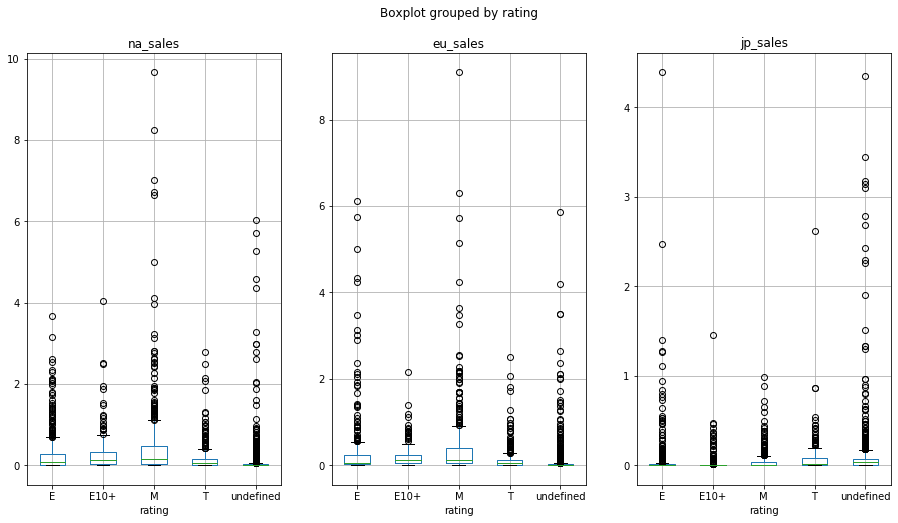

In [146]:
plt.subplots(figsize = (15,8)) #задаем таблицу для отрисовки графиков вместе
#(для этого вызываем метод subplots)
data_games_upd.boxplot('na_sales', by = 'rating', ax = plt.subplot(1, 3, 1)) #первая ячейка
data_games_upd.boxplot('eu_sales', by = 'rating', ax = plt.subplot(1, 3, 2)) #вторая ячейка
data_games_upd.boxplot('jp_sales', by = 'rating', ax = plt.subplot(1, 3, 3)) #третья ячейка


в Северной Америке видим, что игры рейтинга M («Mature») самые популярные, далее идут игры от 10 лет и стерше, далее для всех.
Примерный портрет пользрвателя - взрослые люди в массе, далее, дети младшего и среднего школьного возраста, далее универсальные игры

в Европе картина аналогичная
в Японии самые популярные подростковые игры, что ярко отличает Японию от прочих регионов

---
## Комментарий от наставника

портрет типичного пользователя каждого из регионов получен. Здорово, что отмечены индивидуальные особенности каждого региона. 

---

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
приступим к проверке статистической гипотезы. сформулируем гипотезы начнём с формулировки нулевой гипотезы H₀,исходя из правила,H₀ всегда формулируется так, чтобы использовать знак равенства в нашем случае нулевая гипотеза может быть сформулирована так средние пользовательские рейтинги платформ Xbox One и PC одинаковые


перед проведением стат теста удалим пропуски

In [147]:
PC=data_games_upd[(data_games_upd['user_score'].notna()) & (data_games_upd['platform']=='PC')]

In [148]:
Xbox=data_games_upd[(data_games_upd['user_score'].notna()) & (data_games_upd['platform']=='XOne')]

In [149]:
from scipy import stats as st
import numpy as np
alpha = .05 


hypothesis_1 = st.ttest_ind(PC['user_score'], Xbox['user_score'])
print('p-значение:', hypothesis_1.pvalue)

if (hypothesis_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


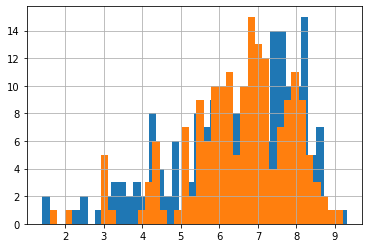

In [150]:
PC['user_score'].hist(bins=40)
Xbox['user_score'].hist(bins=40)
plt.ticklabel_format(style='plain')

видим и визуально, что распределения достаточно близки

Вывод: нулевая гипотеза подтверждена:средние пользовательские рейтинги платформ Xbox One и PC одинаковые

---
## Комментарий от наставника

Гипотезы сформулированы и проверены верно.

---

Гипотеза 2 Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
приступим к проверке статистической гипотезы. сформулируем гипотезы начнём с формулировки нулевой гипотезы H₀,исходя из правила,H₀ всегда формулируется так, чтобы использовать знак равенства в нашем случае нулевая гипотеза может быть сформулирована 
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

In [151]:
Sports=data_games_upd[(data_games_upd['user_score'].notna()) & (data_games_upd['genre']=='Sports')]

In [152]:
Action=data_games_upd[(data_games_upd['user_score'].notna()) & (data_games_upd['genre']=='Action')]

In [153]:
alpha = .05 


hypothesis_1 = st.ttest_ind(Sports['user_score'], Action['user_score'])
print('p-значение:', hypothesis_1.pvalue)

if (hypothesis_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


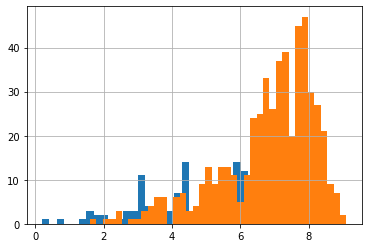

In [154]:
Sports['user_score'].hist(bins=40)
Action['user_score'].hist(bins=40)
plt.ticklabel_format(style='plain')

визуальная оценка подтверждает, что распределения разные и гипотеза отвергнута корректно

Общий вывод:
были проанализированы игры за период 28 лет.
Были выявлены следующие закономерности - основной период жизненного цикла платформы, в течение которого она приносит стабильный или растущий доход 5 лет (значения находятся в пределах диапазона 4-6 лет).
оценка пользователей и критиков прямо не влияет на популярность игры, поэтому, при оценке ее популярности полагаться на них, как основные определяющие успех критерии не стоит
важно исследовать платформу, на которой выходит игра и ее жанр.
методологи выявления популярно игры может быть примерно следующая:
1. исследовать рынок и понять, как из игр могут быть на пике жизненного цикла, когда она приносят самый максимальный доход.
2. определить максимально популярнуб платформу и жанр на момент ценки
3. сравнить две-три топзплтформ и жанров, решить какое соотношение самое прибыльное (популярное)
4. сиходя из этого, выбрать игру из представленных на рынке
5. определить рейтинг (чтобы понять целевую аудиторию для рекламы).

---
## Комментарий от наставника

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. 

## Комментарий от наставника



Ты проделала большую работу, молодец! Работа выполнена хорошо. Продолжай в том же духе :)

-----